# Cuhurn Modelling

- https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset

- RowNumber: A unique identifier for each row in the dataset.

- CustomerId: Unique customer identification number.

- Surname: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).

- CreditScore: The customer's credit score at the time of data collection.

- Geography: The customer's country or region, providing insights into location-based trends in churn.

- Gender: The customer's gender.

- Age: The customer's age, valuable for demographic analysis.

- Tenure: The number of years the customer has been with the bank.

- Balance: The customer's account balance.

- Num Of Products: The number of products the customer has purchased or subscribed to.

- HasCrCard: Indicates whether the customer has a credit card (1) or not (0).

- IsActiveMember: Indicates whether the customer is an active member (1) or not (0).

- EstimatedSalary: The customer's estimated salary.

- Exited: The target variable, indicating whether the customer has churned (1) or not (0).

In [56]:
import openpyxl
import xlsxwriter
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import kstest
import plotly.express as px
import plotly.graph_objects as go
import openpyxl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import time 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import shap
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostClassifier
import joblib
SEED = 42
warnings.filterwarnings("ignore")



In [57]:
data = pd.read_csv("./Churn_Modellingr.csv", sep = ",")

In [58]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df =data.copy()

In [60]:
df = df.drop_duplicates()

In [61]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [62]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [63]:
df["Exited"].value_counts() ## 0    7963  , 1    2037

Exited
0    7963
1    2037
Name: count, dtype: int64

In [64]:
df["NumOfProducts"].value_counts() 

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [65]:
df["HasCrCard"].value_counts() 

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [66]:
df["IsActiveMember"].value_counts() 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [67]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Balance', ylabel='Count'>

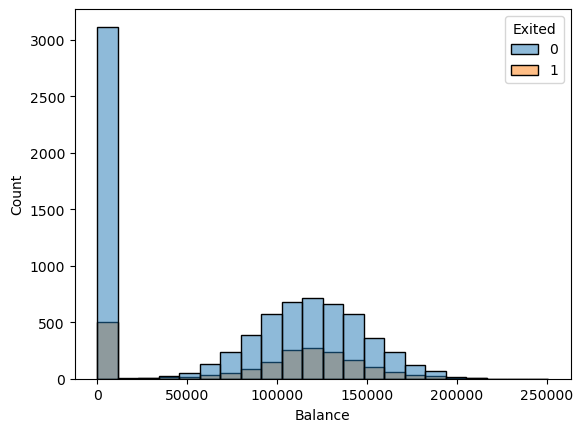

In [70]:
sns.histplot(data=df, x='Balance', hue='Exited')

#plt.show()


<Axes: xlabel='CreditScore', ylabel='Count'>

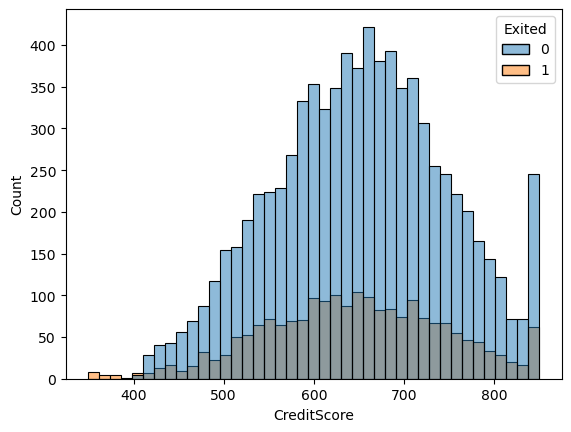

In [71]:
sns.histplot(data=df, x='CreditScore', hue='Exited')


<Axes: xlabel='Age', ylabel='Count'>

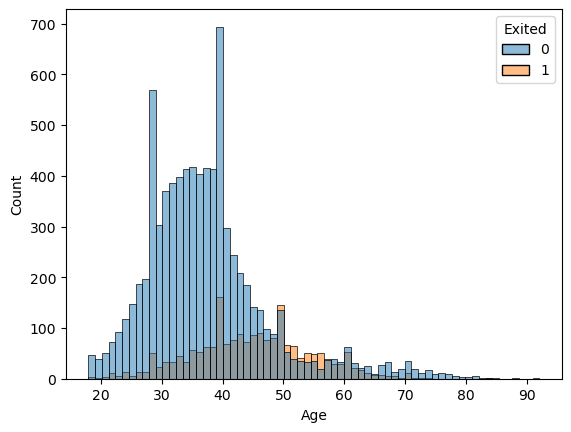

In [72]:
sns.histplot(data=df, x='Age', hue='Exited')

<Axes: xlabel='NumOfProducts', ylabel='Count'>

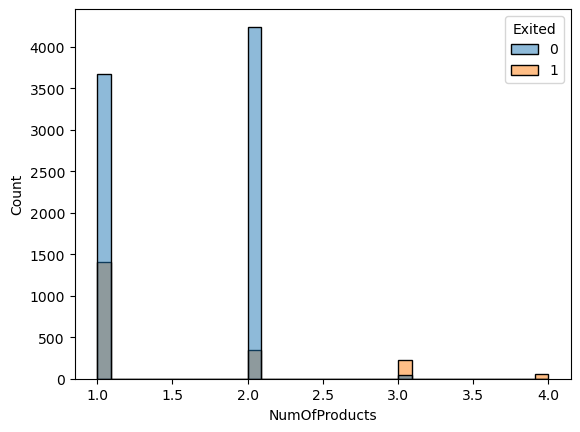

In [73]:
sns.histplot(data=df, x='NumOfProducts', hue='Exited')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

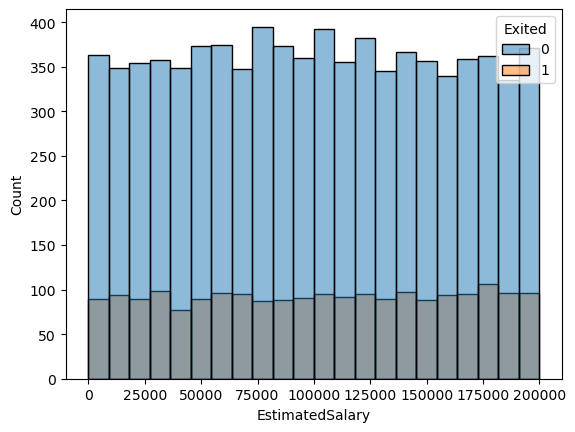

In [74]:
sns.histplot(data=df, x='EstimatedSalary', hue='Exited')

<Axes: xlabel='Tenure', ylabel='Count'>

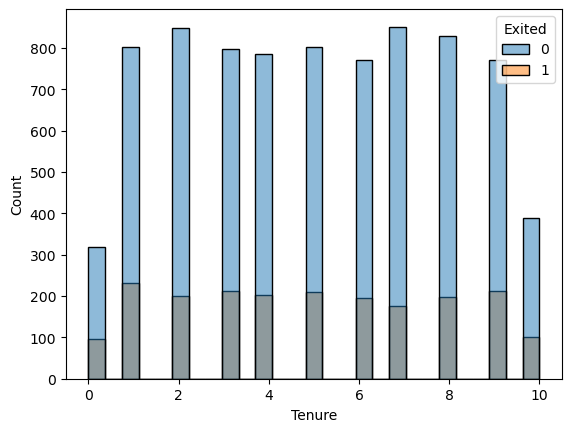

In [75]:
sns.histplot(data=df, x='Tenure', hue='Exited')

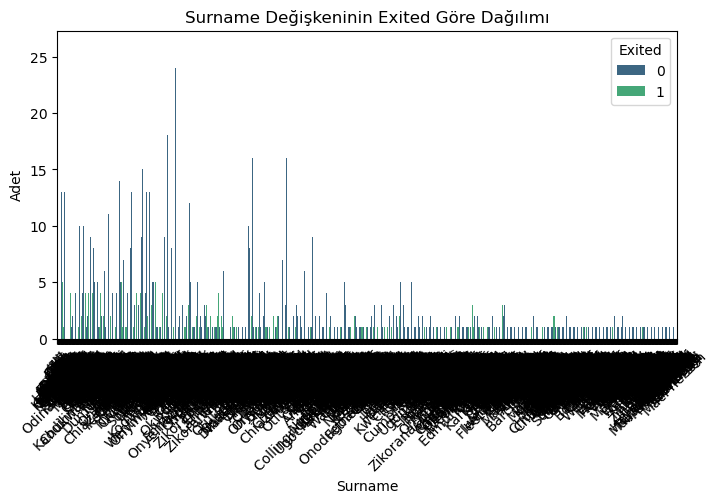

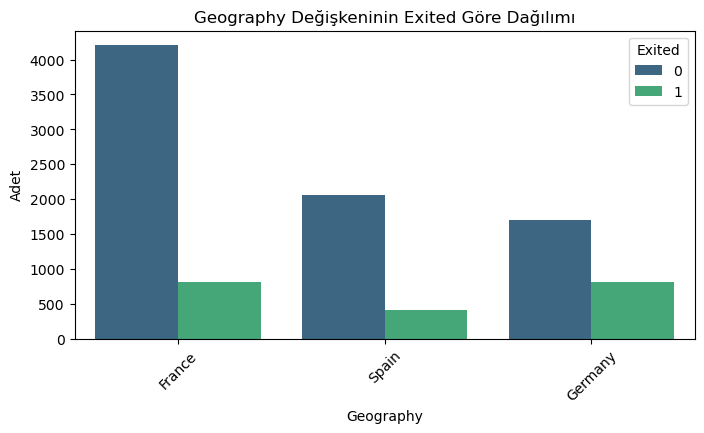

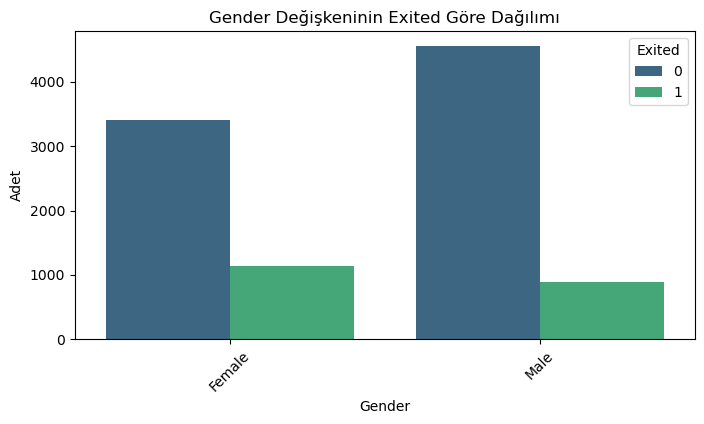

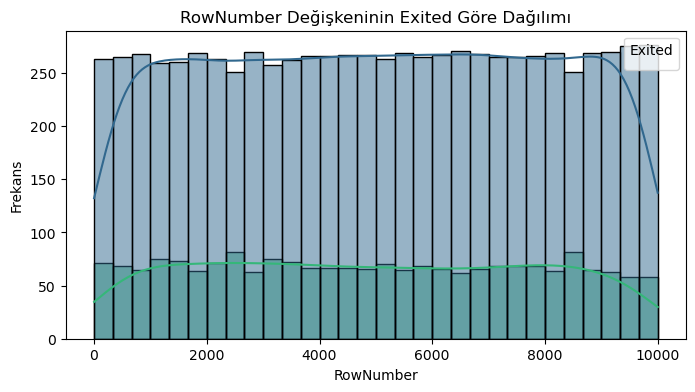

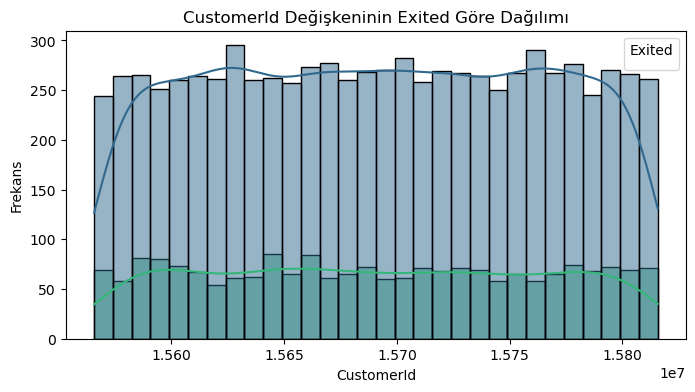

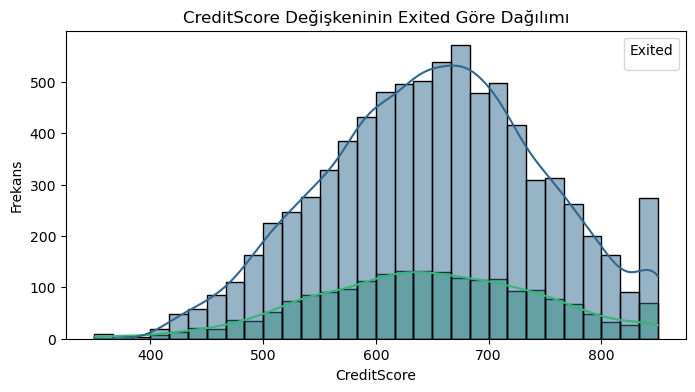

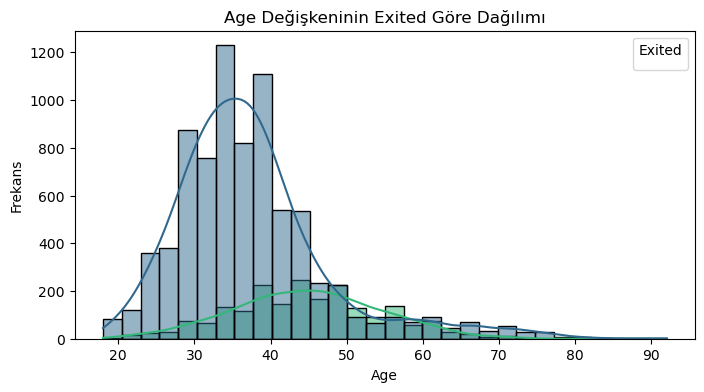

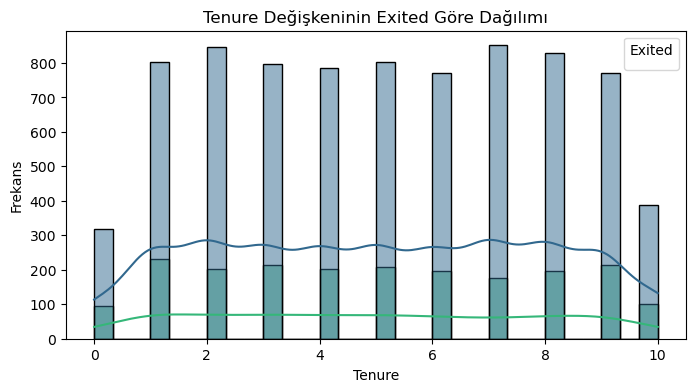

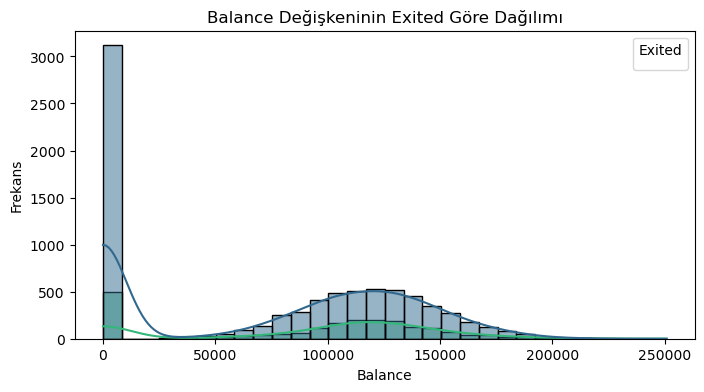

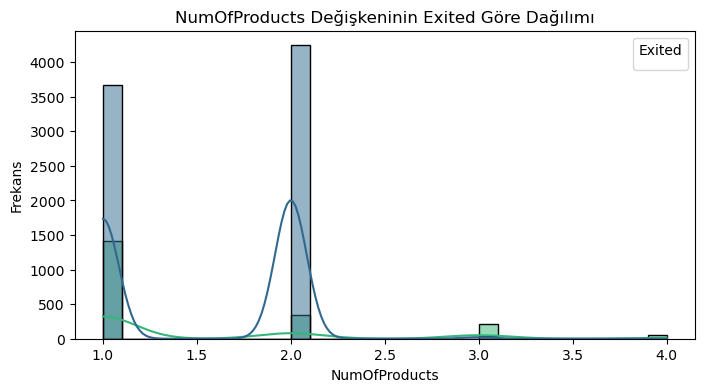

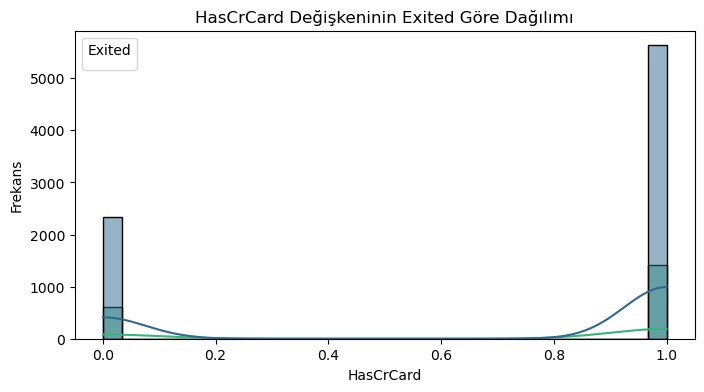

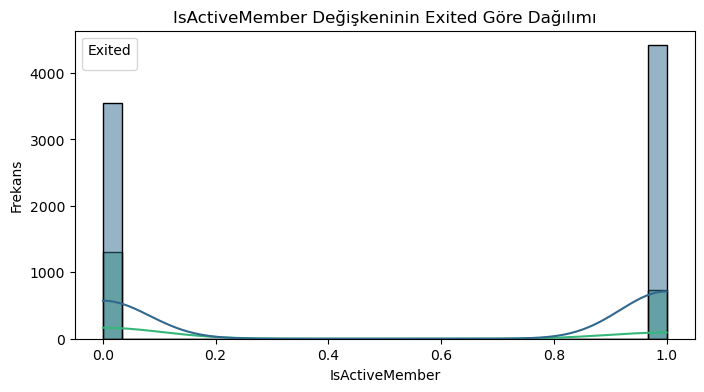

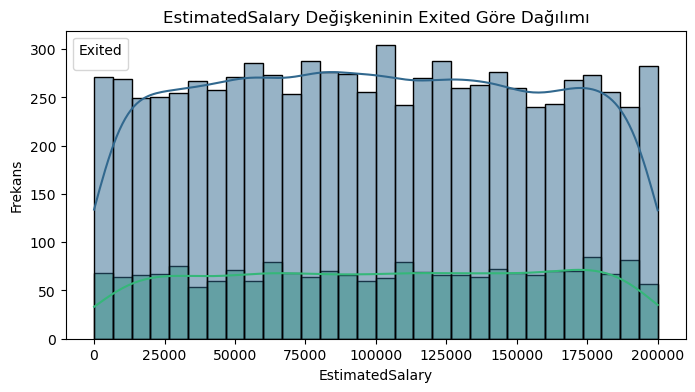

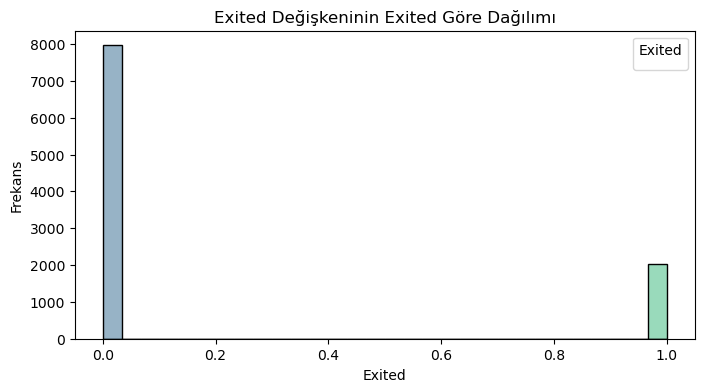

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data_by_target(data, target):
    """
    DataFrame içindeki kategorik ve sürekli değişkenleri hedef değişkene ('target') göre analiz eder
    ve uygun grafiklerle görselleştirir.
    """
    # Kategorik ve sürekli değişkenleri ayır
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.drop(target, errors='ignore')
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    
    # Kategorik değişkenler için barplot
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=data[col], hue=data[target], palette="viridis")
        plt.title(f"{col} Değişkeninin {target} Göre Dağılımı")
        plt.xlabel(col)
        plt.ylabel("Adet")
        plt.xticks(rotation=45)
        plt.legend(title=target)
        plt.show()

    # Sürekli değişkenler için KDE ve histogram
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(data, x=col, hue=target, kde=True, bins=30, palette="viridis", alpha=0.5)
        plt.title(f"{col} Değişkeninin {target} Göre Dağılımı")
        plt.xlabel(col)
        plt.ylabel("Frekans")
        plt.legend(title=target)
        plt.show()
visualize_data_by_target(df, 'Exited')

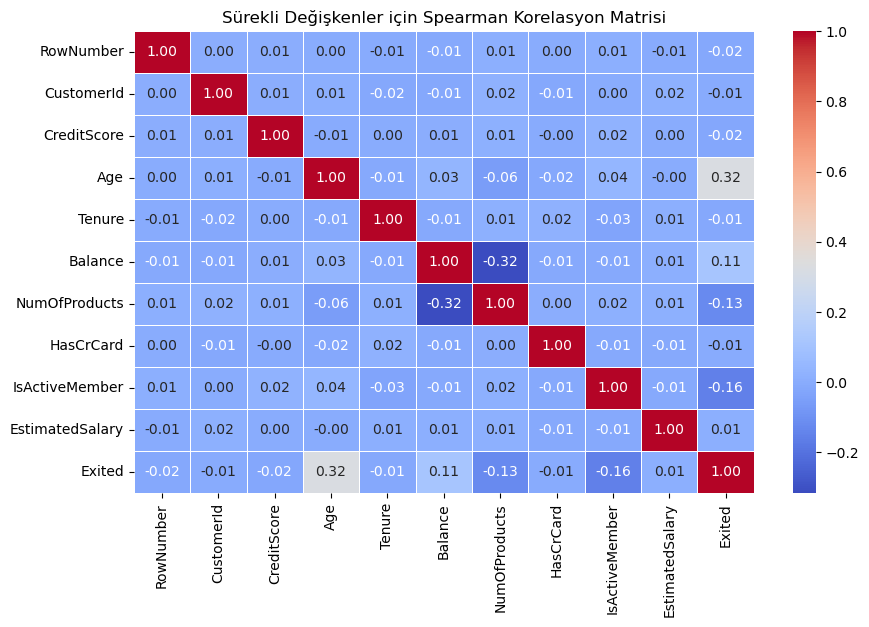

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004187     0.005130  0.000476 -0.006934   
CustomerId        0.004187    1.000000     0.005967  0.008775 -0.015072   
CreditScore       0.005130    0.005967     1.000000 -0.007974  0.001133   
Age               0.000476    0.008775    -0.007974  1.000000 -0.010405   
Tenure           -0.006934   -0.015072     0.001133 -0.010405  1.000000   
Balance          -0.009013   -0.013932     0.005687  0.033304 -0.009513   
NumOfProducts     0.008305    0.019297     0.012568 -0.058566  0.012908   
HasCrCard         0.000599   -0.014023    -0.003802 -0.015278  0.022354   
IsActiveMember    0.012044    0.001682     0.024262  0.039839 -0.028673   
EstimatedSalary  -0.006007    0.015246     0.001237 -0.002431  0.007778   
Exited           -0.016571   -0.006264    -0.023289  0.323968 -0.013978   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009013   

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

def select_correlation_method(data, alpha=0.05):
    """
    DataFrame içindeki sürekli değişkenlerin normal dağılıp dağılmadığını kontrol eder
    ve uygun korelasyon metodunu seçerek korelasyon matrisini oluşturur.
    
    Eğer değişkenler normal dağılıyorsa Pearson, değilse Spearman kullanılır.
    """
    # Sürekli değişkenleri seç
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    normality_results = {}

    for col in numerical_cols:
        sample = data[col].dropna()
        if len(sample) > 5000:  # Shapiro testi 5000 örnekle sınırlıdır
            normality_results[col] = False
        else:
            stat, p = shapiro(sample)
            normality_results[col] = p > alpha  # p > 0.05 ise normal dağılıyor kabul et

    # Korelasyon metodu belirleme
    if all(normality_results.values()):
        method = "pearson"  # Tüm değişkenler normal ise Pearson
    else:
        method = "spearman"  # En az biri normal değilse Spearman

    # Korelasyon matrisini hesapla
    corr_matrix = data[numerical_cols].corr(method=method)

    # Korelasyon matrisini görselleştir
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Sürekli Değişkenler için {method.capitalize()} Korelasyon Matrisi")
    plt.show()

    return corr_matrix
correlation_matrix = select_correlation_method(data)
print(correlation_matrix)

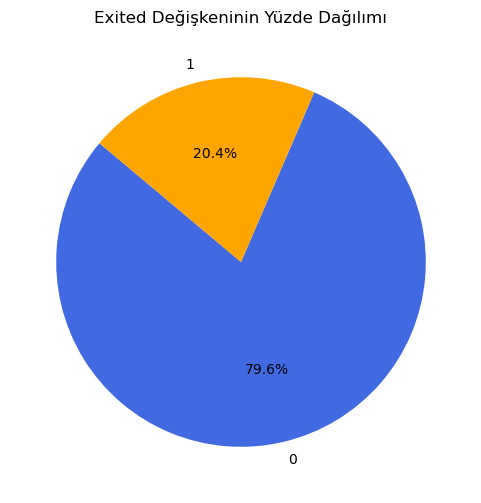

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_income_distribution(data, target):
    """
    Hedef değişkenin (income) iki sınıfının toplam verideki yüzde dağılımını gösteren pasta grafiği çizer.
    """
    # Sınıf yüzdelerini hesapla
    class_counts = data[target].value_counts(normalize=True) * 100
    
    # Pasta grafiği çiz
    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['royalblue', 'orange'], startangle=140)
    plt.title(f"{target} Değişkeninin Yüzde Dağılımı")
    plt.show()

# Fonksiyonu çağır
plot_income_distribution(df, 'Exited')


In [79]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [80]:
x = df[[ 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = df[['Exited']]


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED, stratify=y, 
    shuffle=True )

In [82]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,739,Germany,Male,32,3,102128.27,1,1,0,63981.37
5006,755,Germany,Female,37,0,113865.23,2,1,1,117396.25
4117,561,France,Male,37,5,0.00,2,1,0,83093.25
7182,692,Germany,Male,49,6,110540.43,2,0,1,107472.99
...,...,...,...,...,...,...,...,...,...,...
4555,688,Spain,Female,35,6,0.00,1,1,0,25488.43
4644,712,Spain,Male,74,5,0.00,2,0,0,151425.82
8942,667,France,Female,37,9,71786.90,2,1,1,67734.79
2935,687,Spain,Male,35,8,100988.39,2,1,0,22247.27


In [83]:
# One-Hot Encoding uygulama
x_train = pd.get_dummies(x_train, columns=[ "Geography", 'Gender',
                                         "HasCrCard",
                                         "IsActiveMember"
                                         
                                        ], drop_first=True)

In [84]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
2151,753,57,7,0.00,1,159475.08,False,False,True,True,False
8392,739,32,3,102128.27,1,63981.37,True,False,True,True,False
5006,755,37,0,113865.23,2,117396.25,True,False,False,True,True
4117,561,37,5,0.00,2,83093.25,False,False,True,True,False
7182,692,49,6,110540.43,2,107472.99,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4555,688,35,6,0.00,1,25488.43,False,True,False,True,False
4644,712,74,5,0.00,2,151425.82,False,True,True,False,False
8942,667,37,9,71786.90,2,67734.79,False,False,False,True,True
2935,687,35,8,100988.39,2,22247.27,False,True,True,True,False


In [85]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [86]:
#scaler = StandardScaler()
#x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])


In [87]:
x_test = pd.get_dummies(x_test, columns=[ "Geography", 'Gender',
                                         "HasCrCard",
                                         "IsActiveMember"
                                         
                                        ], drop_first=True)


In [88]:
#x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [89]:
from xgboost import XGBClassifier

# scale_pos_weight = (sınıf_0 sayısı) / (sınıf_1 sayısı)
scale_pos = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_model = XGBClassifier(scale_pos_weight=scale_pos, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Doğruluk Skoru:", accuracy)
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred)
f1

Test Seti Doğruluk Skoru: 0.853

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



0.5763688760806917

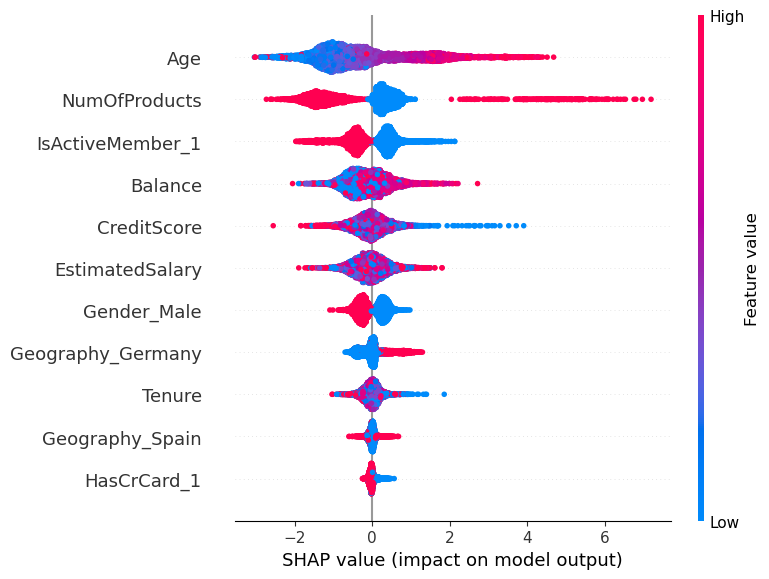

In [90]:
# SHAP Grafiği
import shap
import matplotlib.pyplot as plt

# 1. SHAP explainer oluştur
explainer = shap.Explainer(xgb_model)

# 2. Eğitim verisini verip SHAP değerlerini al (train verisiyle başlıyoruz)
shap_values = explainer(x_train)

# 3. SHAP Summary Plot (özelliklerin etkisini gösterir)
shap.summary_plot(shap_values, x_train)


In [91]:
# hangi sınıf sağ tarafta kalacak görmek için baktık.
xgb_model.classes_


array([0, 1])

SHAP yorumu;
- NumOfProducts en etkili değişkendir.
- NumOfProducts çok olması churn olma riskini azaltırken az olması arttırır.
- Age arttıkça churn olma riski artar.
- Erkek müşteriler churn etme eğiliminde
- En etkisiz değişkenler high_balance_low_credit, tenure_category_medium, HasCrCard, Geography_German değişkenleridir.

# LIME 

In [92]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(training_data=x_train.values,
                                 feature_names=x_train.columns,
                                 class_names=['stay', 'churn'], #  xgb_model.classes_  buradaki değerlerin etikettidir.
                                 mode='classification')

exp = explainer.explain_instance(x_test.iloc[0].values,  ## buradan herhnagi bir örnek seçebilirsin!!!
                                 xgb_model.predict_proba,
                                 num_features=5)

exp.show_in_notebook()


- LIME örnek bir müşteri seçip onun özelliklerini yorumluyor;
- Seçilen bu müşterinin churn olma ihtimali falzadır.
- Turuncu ifadeler churn etmeye pozitif etki etmiş değşkenleri göstermektedir.
- Mavi değişkenler churn olma olasılığını azaltan değşkenleri göstermektedir.
- LIME daha yerel bir çözümdür, örnekler üzerinden modele etki eden değişkenlere bakar. Genel çerceveye bakmak (en çok etki eden 5 değşkeni görmek gibi) isiyorsan SHAP daha isabetlidir.
- Ama eğer ilk 100 gözlem için bakmak istiyorsak aşağıdaki kod ile yaapbiliriz

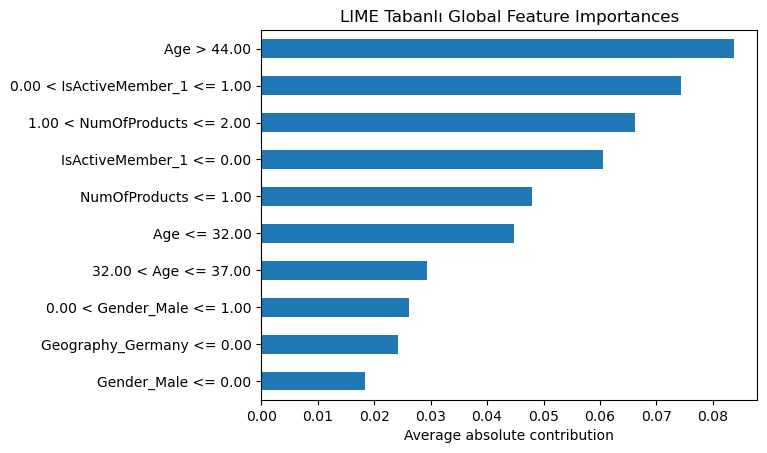

In [93]:
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=x_train.columns.tolist(),
    class_names=['Stay', 'Churn'],
    mode='classification'
)

# Birden fazla gözlem için feature importanceları topluyoruz
feature_weights = []

for i in range(0, 100):  # ilk 100 gözlemi örnek alalım
    exp = explainer.explain_instance(
        x_test.iloc[i].values,
        xgb_model.predict_proba,
        num_features=len(x_train.columns)
    )
    weights = dict(exp.as_list())
    feature_weights.append(weights)

# Listeyi DataFrame’e çeviriyoruz
df_weights = pd.DataFrame(feature_weights).fillna(0)

# Ortalama katkı büyüklüğünü al (mutlak değerle)
global_importance = df_weights.abs().mean().sort_values(ascending=False)

# Görselleştir (istenirse)
import matplotlib.pyplot as plt

global_importance.head(10).plot(kind='barh')
plt.title("LIME Tabanlı Global Feature Importances")
plt.gca().invert_yaxis()
plt.xlabel("Average absolute contribution")
plt.show()


- NumOfProducts <= 1.00 = 	           1 veya daha az ürün kullanan müşteriler modelde en belirleyici grup olmuş. Muhtemelen bu durum churn ihtimalini artırıyor (sadakatsizlik göstergesi olabilir).
- 	1.00 < NumOfProducts <= 2.00 =   	2 ürün kullanan müşteriler de churn açısından kritik. Modelin karar mekanizmasında ürün sayısı oldukça baskın görünüyor.
- 1.35 < SalaryPerBalance <= 62477.08= 	Maaşına kıyasla yüksek bakiyesi olan müşteriler için model önemli kararlar alıyor. Bu oran modelin dikkat ettiği bir metrik olmuş.

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=SEED)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=SEED)),
    ('AdaBoost', AdaBoostClassifier(random_state=SEED)),
    ('Decision Tree', DecisionTreeClassifier(random_state=SEED)),
    ('LGBMClassifier', LGBMClassifier(random_state=SEED)),
    ('XGBClassifier', XGBClassifier(random_state=SEED))
    


]
scalers = [
    ('Standard Scaler', StandardScaler()),
    ('MinMax Scaler', MinMaxScaler()),
    ('Robust Scaler', RobustScaler())
]

results = []


for scaler_name, scaler in scalers:
    for classifier_name, classifier in classifiers:
        pipeline = Pipeline([
            ('scaler', scaler),  
            ('model', classifier)  
        ])
        
        pipeline.fit(x_train,  y_train)    
        
  
        y_pred = pipeline.predict(x_test)
        
   
        accuracy = accuracy_score(y_test, y_pred)
        results.append((scaler_name, classifier_name, accuracy))
        
        print(f"Scaler: {scaler_name}, Model: {classifier_name}")
        print(f"Doğruluk Skoru: {accuracy:.4f}")
        print("\nSınıflandırma Raporu:")
        print(classification_report(y_test, y_pred))
        print("="*50)

print("\nScaler ve Model Performans Karşılaştırması:")
for scaler_name, classifier_name, accuracy in results:
    print(f"Scaler: {scaler_name}, Model: {classifier_name}, Accuracy: {accuracy:.4f}")

Scaler: Standard Scaler, Model: Random Forest
Doğruluk Skoru: 0.8610

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Scaler: Standard Scaler, Model: Gradient Boosting
Doğruluk Skoru: 0.8700

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Scaler: Standard Scaler, Model: AdaBoost
Doğruluk Skoru: 0.8560

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0    

In [95]:
#scale_pos = len(y_train[y_train==0]) / len(y_train[y_train==1])
pipeline = Pipeline([
    ('scaler', RobustScaler()), 
    ('model', GradientBoostingClassifier(random_state=42))  
])


pipeline.fit(x_train,  y_train)

y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Doğruluk Skoru:", accuracy)
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Test Seti Doğruluk Skoru: 0.87

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [96]:
from sklearn.ensemble import HistGradientBoostingClassifier

pipeline = Pipeline([
    ('scaler', RobustScaler()), 
    ('model', HistGradientBoostingClassifier(class_weight='balanced', random_state=42))
])
pipeline.fit(x_train,  y_train)

y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Doğruluk Skoru:", accuracy)
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))



Test Seti Doğruluk Skoru: 0.8115

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.53      0.71      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Varsayalım df adında bir DataFrame var
df =data.copy()

# Yeni değişkenler üret
df['BalancePerProduct'] = df['Balance'] / (df['NumOfProducts'] + 1)
df['AgeTenureRatio'] = df['Age'] / (df['Tenure'] + 1)
df['CreditPerAge'] = df['CreditScore'] / df['Age']
df['SalaryPerBalance'] = df['EstimatedSalary'] / (df['Balance'] + 1)
df['ActivityCreditRatio'] = df['IsActiveMember'] * df['CreditScore']

df['ActivityNumProduct'] = df['IsActiveMember'] * df['NumOfProducts']

df['TenureBalanceDiff'] = df['Tenure'] - (df['Balance'] / 10000)
df['first_year'] = df['Tenure'].apply(lambda x: 1 if x in [0, 1] else 0)
df['tenure_category'] = pd.cut(df['Tenure'], bins=[-1, 2, 5, 10], labels=["Low", "Medium", "High"])
## df = pd.get_dummies(df, columns=['tenure_category'], drop_first=True)

df['high_balance_low_credit'] = ((df['Balance'] > 100000) & (df['CreditScore'] < 600)).astype(int)


# Kategorik olanları encode et
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'tenure_category'], drop_first=True)



# Hedef değişken
y = df['Exited']
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])

# Train/test ayır
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [98]:
x_train= x_train[["CreditScore", "Age", "Tenure", "Balance","NumOfProducts", "IsActiveMember","EstimatedSalary"]]
x_test= x_test[["CreditScore", "Age", "Tenure", "Balance","NumOfProducts", "IsActiveMember","EstimatedSalary"]]

x_train.columns = x_train.columns.str.lower()
x_test.columns = x_test.columns.str.lower()


In [99]:
x_train

,creditscore,age,tenure,balance,numofproducts,isactivemember,estimatedsalary
9254,686,32,6,0.00,2,1,179093.26
1561,632,42,4,119624.60,2,1,195978.86
1670,559,24,3,114739.92,1,0,85891.02
6087,561,27,9,135637.00,1,0,153080.40
6669,517,56,9,142147.32,1,0,39488.04
...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,69381.05
5191,682,58,1,0.00,1,1,706.50
5390,735,38,1,0.00,3,0,92220.12
860,667,43,8,190227.46,1,0,97508.04


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

model1 = GradientBoostingClassifier()
model1.fit(x_train, y_train)  # 🔁 burası önemli, model eğitilmiş olmalı

# Eğitilen modeli kaydet
joblib.dump(model1, "gboosting_model.pkl")

['gboosting_model.pkl']

In [101]:
import joblib
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

joblib.dump(model, "xgb_model.pkl")


['xgb_model.pkl']

In [102]:
pipeline = Pipeline([
    ('scaler', RobustScaler()), 
    ('model', GradientBoostingClassifier(random_state=42))  
])


pipeline.fit(x_train,  y_train)

y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Doğruluk Skoru:", accuracy)
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Test Seti Doğruluk Skoru: 0.86

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

